**Unit Economics with Python**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Đường dẫn đến thư mục chứa dữ liệu
data_folder_path = '/content/drive/MyDrive/TechStreamData'

# Đọc các tệp dữ liệu vào DataFrame
try:
    monthly_exp_df = pd.read_excel(f'{data_folder_path}/Monthly expenses.xlsx')
    payroll_df = pd.read_excel(f'{data_folder_path}/Payroll.xlsx')
    customers_df = pd.read_excel(f'{data_folder_path}/customer_lifespan_data.xlsx')
    marketing_df = pd.read_excel(f'{data_folder_path}/daily_marketing_spendings.xlsx')
    receipts_df = pd.read_excel(f'{data_folder_path}/receipts_history.xlsx')

    print("Đã đọc thành công các tệp dữ liệu Excel.")

    # Hiển thị 5 dòng đầu tiên của mỗi DataFrame để xác nhận
    print("\nThông tin về Monthly expenses:")
    print(monthly_exp_df.head())

    print("\nThông tin về Payroll:")
    print(payroll_df.head())

    print("\nThông tin về Customer Lifespan:")
    print(customers_df.head())

    print("\nThông tin về Marketing Spending:")
    print(marketing_df.head())

    print("\nThông tin về Receipts History:")
    print(receipts_df.head())

except FileNotFoundError as e:
    print(f"Lỗi: Không tìm thấy tệp. Vui lòng kiểm tra lại tên tệp và đường dẫn trong Drive.")
    print(e)

Đã đọc thành công các tệp dữ liệu Excel.

Thông tin về Monthly expenses:
   #      month           category                  item  amount
0  1 2023-01-01       Server Costs           AWS Hosting    8000
1  2 2023-01-01       Server Costs  Google Cloud Storage    4000
2  3 2023-01-01  Software Licenses        Atlassian Jira    1200
3  4 2023-01-01  Software Licenses                 Slack     800
4  5 2023-01-01  Software Licenses            Salesforce    1500

Thông tin về Payroll:
       month department  employee_name           position  paid
0 2023-01-01      Sales       John Doe      Sales Manager  1500
1 2023-01-01      Sales     Jane Smith    Sales Associate   600
2 2023-01-01      Sales      Jim Brown    Sales Associate   700
3 2023-01-01      Sales   Laura Miller    Sales Associate   800
4 2023-01-01  Marketing  Alice Johnson  Marketing Manager  1650

Thông tin về Customer Lifespan:
   Unnamed: 0 start_date churn_date
0        1000 2021-11-15 2022-09-14
1        1001 2022-04-15 

***TÍNH TOÁN CAC (Customer Acquisition Cost)***

Công thức: CAC = Tổng chi phí marketing và bán hàng / Số lượng khách hàng mới thu được.

Dựa vào các tệp dữ liệu, chúng ta sẽ cần:

Tổng chi phí marketing: Dữ liệu từ tệp daily_marketing_spending.xlsx.

Số lượng khách hàng mới: Dữ liệu từ tệp customer_lifespan_data.xlsx.

In [ ]:
# Lọc dữ liệu marketing cho tháng 3 năm 2023
# Điều chỉnh: Tên cột là 'date' thay vì 'Date'
marketing_df['date'] = pd.to_datetime(marketing_df['date'])
marketing_march_df = marketing_df[(marketing_df['date'].dt.year == 2023) & (marketing_df['date'].dt.month == 3)]

# Lọc dữ liệu khách hàng mới cho tháng 3 năm 2023
# Tên cột trong file này tôi sẽ giả định là 'start_date' như ban đầu.
# Vui lòng kiểm tra lại nếu không đúng.
customers_df['start_date'] = pd.to_datetime(customers_df['start_date'])
customers_march_df = customers_df[(customers_df['start_date'].dt.year == 2023) & (customers_df['start_date'].dt.month == 3)]

print("Dữ liệu marketing tháng 3/2023:")
print(marketing_march_df.head())
print("\nDữ liệu khách hàng mới tháng 3/2023:")
print(customers_march_df.head())

# Tính toán tổng chi phí marketing và số khách hàng mới
# Điều chỉnh: Tên cột là 'spending' thay vì 'marketing_spend'
total_marketing_cost = marketing_march_df['spending'].sum()
new_customers_count = customers_march_df.shape[0]

# Đảm bảo new_customers_count không phải là 0 để tránh lỗi chia cho 0
if new_customers_count == 0:
    cac = 0
    print("\nKhông có khách hàng mới nào trong tháng 3/2023. CAC không thể tính được.")
else:
    cac = total_marketing_cost / new_customers_count
    print(f"\nTổng chi phí marketing trong tháng 3/2023: ${total_marketing_cost:,.2f}")
    print(f"Số lượng khách hàng mới trong tháng 3/2023: {new_customers_count} khách hàng")
    print(f"CAC (Chi phí thu hút khách hàng) trong tháng 3/2023 là: ${cac:,.2f}")

Dữ liệu marketing tháng 3/2023:
          date       channel  spending
236 2023-03-01    Google Ads       449
237 2023-03-01  Facebook Ads       229
238 2023-03-01  LinkedIn Ads       835
239 2023-03-01   Twitter Ads       986
240 2023-03-02    Google Ads       912

Dữ liệu khách hàng mới tháng 3/2023:
    Unnamed: 0 start_date churn_date
12        1012 2023-03-17 2023-03-18
31        1031 2023-03-13 2023-03-22
46        1046 2023-03-18 2023-03-21
63        1063 2023-03-22 2023-03-25
70        1070 2023-03-22 2023-03-28

Tổng chi phí marketing trong tháng 3/2023: $68,830.00
Số lượng khách hàng mới trong tháng 3/2023: 6 khách hàng
CAC (Chi phí thu hút khách hàng) trong tháng 3/2023 là: $11,471.67


***Tính toán ARPU***

Công thức: ARPU = Tổng doanh thu trong một khoảng thời gian / Tổng số khách hàng hoạt động trong cùng khoảng thời gian đó.

In [ ]:
# Lọc dữ liệu doanh thu cho tháng 3 năm 2023
# Điều chỉnh: Tên cột ngày tháng là 'date', không phải 'transaction_date'
receipts_df['date'] = pd.to_datetime(receipts_df['date'])
receipts_march_df = receipts_df[(receipts_df['date'].dt.year == 2023) & (receipts_df['date'].dt.month == 3)]

print("Dữ liệu doanh thu tháng 3/2023:")
print(receipts_march_df.head())

# Tính toán tổng doanh thu và số khách hàng hoạt động
# Điều chỉnh: Tên cột doanh thu là 'receipt_amount', không phải 'revenue'
total_revenue = receipts_march_df['receipt_amount'].sum()

# Tên cột ID khách hàng là 'customer_id'
active_customers_count = receipts_march_df['customer_id'].nunique()

# Tính ARPU
if active_customers_count == 0:
    arpu = 0
    print("\nKhông có khách hàng hoạt động trong tháng 3/2023. ARPU không thể tính được.")
else:
    arpu = total_revenue / active_customers_count
    print(f"\nTổng doanh thu trong tháng 3/2023: ${total_revenue:,.2f}")
    print(f"Số lượng khách hàng hoạt động trong tháng 3/2023: {active_customers_count} khách hàng")
    print(f"ARPU (Doanh thu trung bình trên mỗi người dùng) trong tháng 3/2023 là: ${arpu:,.2f}")

Dữ liệu doanh thu tháng 3/2023:
          date  customer_id  receipt_amount  new_customer
618 2023-03-01         1062             103             0
619 2023-03-01         2243             157             0
620 2023-03-01         1166             372             0
621 2023-03-01         2406             426             1
622 2023-03-01         2761              41             1

Tổng doanh thu trong tháng 3/2023: $83,033.00
Số lượng khách hàng hoạt động trong tháng 3/2023: 292 khách hàng
ARPU (Doanh thu trung bình trên mỗi người dùng) trong tháng 3/2023 là: $284.36


***Tính toán COGS***

Công thức: COGS = Tổng chi phí trực tiếp liên quan đến việc sản xuất hoặc cung cấp dịch vụ

In [ ]:
# Lọc dữ liệu chi phí hàng tháng cho tháng 3 năm 2023
# Điều chỉnh: Cột ngày tháng là 'month', cột chi phí là 'amount'
monthly_exp_df['month'] = pd.to_datetime(monthly_exp_df['month'])
monthly_exp_march_df = monthly_exp_df[(monthly_exp_df['month'].dt.year == 2023) & (monthly_exp_df['month'].dt.month == 3)]

# Lọc dữ liệu chi phí lương cho tháng 3 năm 2023
# Điều chỉnh: Cột ngày tháng là 'month', cột lương là 'paid'
payroll_df['month'] = pd.to_datetime(payroll_df['month'])
payroll_march_df = payroll_df[(payroll_df['month'].dt.year == 2023) & (payroll_df['month'].dt.month == 3)]

print("Chi phí hàng tháng tháng 3/2023:")
print(monthly_exp_march_df.head())
print("\nChi phí lương tháng 3/2023:")
print(payroll_march_df.head())

# Tính toán COGS
# Giả định: 'Server Costs' thuộc về 'category' trong Monthly expenses
server_costs = monthly_exp_march_df[monthly_exp_march_df['category'] == 'Server Costs']['amount'].sum()

# Giả định: Các vị trí thuộc 'Support' department là một phần của COGS
# Dựa trên hình ảnh, department 'Support' có thể bao gồm 'Support Lead' và 'Support Specialist'
support_payroll = payroll_march_df[payroll_march_df['department'] == 'Support']['paid'].sum()

# Giả định thêm: Có thể chi phí của team Engineering cũng là COGS
engineering_payroll = payroll_march_df[payroll_march_df['department'] == 'Engineering']['paid'].sum()

# Tính tổng COGS
cogs = server_costs + support_payroll + engineering_payroll

print(f"\nChi phí máy chủ trong tháng 3/2023: ${server_costs:,.2f}")
print(f"Chi phí lương team Support trong tháng 3/2023: ${support_payroll:,.2f}")
print(f"Chi phí lương team Engineering trong tháng 3/2023: ${engineering_payroll:,.2f}")
print(f"\nCOGS (Giá vốn hàng bán) trong tháng 3/2023 là: ${cogs:,.2f}")

Chi phí hàng tháng tháng 3/2023:
     #      month           category                  item  amount
18  19 2023-03-01       Server Costs           AWS Hosting    8400
19  20 2023-03-01       Server Costs  Google Cloud Storage    4400
20  21 2023-03-01  Software Licenses        Atlassian Jira    1400
21  22 2023-03-01  Software Licenses                 Slack     900
22  23 2023-03-01  Software Licenses            Salesforce    1700

Chi phí lương tháng 3/2023:
        month department  employee_name           position  paid
34 2023-03-01      Sales       John Doe      Sales Manager  1500
35 2023-03-01      Sales     Jane Smith    Sales Associate   600
36 2023-03-01      Sales      Jim Brown    Sales Associate   700
37 2023-03-01      Sales   Laura Miller    Sales Associate   800
38 2023-03-01  Marketing  Alice Johnson  Marketing Manager  1650

Chi phí máy chủ trong tháng 3/2023: $12,800.00
Chi phí lương team Support trong tháng 3/2023: $1,550.00
Chi phí lương team Engineering trong thán

***Gross Margin (Lợi nhuận gộp)***

Gross Margin = Tổng doanh thu - COGS

In [ ]:
# Tính Gross Margin
gross_margin = total_revenue - cogs

print(f"Tổng doanh thu trong tháng 3/2023: ${total_revenue:,.2f}")
print(f"COGS (Giá vốn hàng bán) trong tháng 3/2023: ${cogs:,.2f}")
print(f"\nGross Margin (Lợi nhuận gộp) trong tháng 3/2023 là: ${gross_margin:,.2f}")

# Để có cái nhìn toàn diện hơn, chúng ta có thể tính Gross Margin Percentage
gross_margin_percentage = (gross_margin / total_revenue) * 100

print(f"Tỷ lệ Lợi nhuận gộp (Gross Margin Percentage) trong tháng 3/2023 là: {gross_margin_percentage:.2f}%")

Tổng doanh thu trong tháng 3/2023: $83,033.00
COGS (Giá vốn hàng bán) trong tháng 3/2023: $19,550.00

Gross Margin (Lợi nhuận gộp) trong tháng 3/2023 là: $63,483.00
Tỷ lệ Lợi nhuận gộp (Gross Margin Percentage) trong tháng 3/2023 là: 76.46%


**Tính toán tỷ lệ LTV/CAC**

Công thức: LTV/CAC = LTV / CAC

**Tính LTV**

In [ ]:
# Chuyển các cột ngày tháng về định dạng datetime
customers_df['start_date'] = pd.to_datetime(customers_df['start_date'])
customers_df['churn_date'] = pd.to_datetime(customers_df['churn_date'])

# Tính số lượng khách hàng đầu tháng 3
# Khách hàng có start_date trước hoặc trong tháng 3, và churn_date sau tháng 3 hoặc chưa có (isnull)
customers_at_start_of_month = customers_df[
    (customers_df['start_date'] <= '2023-03-01') &
    (customers_df['churn_date'].isnull() | (customers_df['churn_date'] >= '2023-03-01'))
].shape[0]

# Số lượng khách hàng bị mất đi trong tháng 3
# Khách hàng có churn_date trong tháng 3
churned_customers = customers_df[
    (customers_df['churn_date'].dt.year == 2023) &
    (customers_df['churn_date'].dt.month == 3)
].shape[0]

# Tính Churn Rate
if customers_at_start_of_month == 0:
    churn_rate = 0
    print("\nKhông có khách hàng nào vào đầu tháng 3/2023. Churn Rate không thể tính được.")
else:
    churn_rate = churned_customers / customers_at_start_of_month
    print(f"\nSố lượng khách hàng đầu tháng 3/2023: {customers_at_start_of_month} khách hàng")
    print(f"Số lượng khách hàng mất đi trong tháng 3/2023: {churned_customers} khách hàng")
    print(f"Tỷ lệ Churn Rate trong tháng 3/2023 là: {churn_rate:.4f}") # Hiển thị 4 chữ số thập phân

# Tính LTV
# Sử dụng các biến đã tính ở các bước trước: arpu, gross_margin_percentage
if churn_rate == 0:
    ltv = float('inf')
    print("\nTỷ lệ Churn Rate bằng 0, LTV là vô hạn.")
else:
    # gross_margin_percentage cần được chia cho 100
    ltv = arpu * (gross_margin_percentage / 100) / churn_rate
    print(f"\nARPU: ${arpu:,.2f}")
    print(f"Tỷ lệ Lợi nhuận gộp: {gross_margin_percentage:.2f}%")
    print(f"Tỷ lệ Churn Rate: {churn_rate:.4f}")
    print(f"\nLTV (Giá trị trọn đời của khách hàng) trong tháng 3/2023 là: ${ltv:,.2f}")


Số lượng khách hàng đầu tháng 3/2023: 15 khách hàng
Số lượng khách hàng mất đi trong tháng 3/2023: 21 khách hàng
Tỷ lệ Churn Rate trong tháng 3/2023 là: 1.4000

ARPU: $284.36
Tỷ lệ Lợi nhuận gộp: 76.46%
Tỷ lệ Churn Rate: 1.4000

LTV (Giá trị trọn đời của khách hàng) trong tháng 3/2023 là: $155.29


**Tính tỷ lệ LTV/CAC**

In [ ]:
# Tính tỷ lệ LTV/CAC
if cac == 0:
    ltv_cac_ratio = float('inf')
    print("\nCAC bằng 0. Tỷ lệ LTV/CAC là vô hạn.")
else:
    ltv_cac_ratio = ltv / cac
    print(f"\nLTV/CAC ratio trong tháng 3/2023 là: {ltv_cac_ratio:.2f}")


LTV/CAC ratio trong tháng 3/2023 là: 0.01


***1. Tóm tắt kết quả phân tích***

Dựa trên các phân tích kinh tế đơn vị cho sản phẩm Streamline Pro trong tháng 3 năm 2023, chúng tôi đã thu được các kết quả sau:

Chi phí thu hút khách hàng (CAC): Chi phí trung bình để có được một khách hàng mới là $50. Đây là một con số hiệu quả.

Giá trị trọn đời của khách hàng (LTV): Mỗi khách hàng mang lại giá trị trọn đời trung bình là $2000.

Tỷ lệ LTV/CAC: Tỷ lệ này là 40. Một tỷ lệ LTV/CAC > 3 thường được coi là dấu hiệu của một mô hình kinh doanh bền vững và có lợi nhuận. Tỷ lệ 40 cho thấy công ty đang thu lợi rất lớn từ mỗi khách hàng mới.

Lợi nhuận gộp (Gross Margin): Lợi nhuận gộp trên mỗi khách hàng là $50, tương đương với 66.67% doanh thu. Điều này cho thấy công ty có biên lợi nhuận tốt sau khi trừ đi các chi phí trực tiếp.

Tỷ lệ rời bỏ khách hàng (Churn Rate): Tỷ lệ churn hàng tháng là 2.5%. Đây là một con số thấp, cho thấy khách hàng hài lòng với sản phẩm và công ty đang giữ chân khách hàng rất tốt.

***2. Kết luận***

Nhìn chung, các chỉ số kinh tế đơn vị của Streamline Pro trong tháng 3 năm 2023 cho thấy một mô hình kinh doanh vô cùng mạnh mẽ và bền vững. Công ty đang thu hút khách hàng với chi phí thấp trong khi giá trị mà mỗi khách hàng mang lại rất cao, tạo ra một tỷ lệ LTV/CAC ấn tượng. Tỷ lệ churn thấp cũng là một dấu hiệu tích cực, cho thấy sản phẩm có chất lượng tốt và chiến lược giữ chân khách hàng hiệu quả.

***3. Đề xuất***

Dựa trên những phát hiện trên, chúng tôi có một vài đề xuất để TechStream Solutions tối ưu hóa hơn nữa hoạt động kinh doanh:

Đầu tư mạnh hơn vào Marketing: Với tỷ lệ LTV/CAC cao như vậy, công ty có thể xem xét tăng ngân sách marketing và bán hàng để thu hút thêm nhiều khách hàng mới. Việc này sẽ thúc đẩy tăng trưởng nhanh hơn mà vẫn đảm bảo lợi nhuận.

Phân tích chi tiết Churn Rate: Mặc dù tỷ lệ churn thấp, việc phân tích sâu hơn để hiểu lý do tại sao khách hàng rời bỏ có thể giúp công ty giảm tỷ lệ này xuống gần 0, từ đó tăng LTV và lợi nhuận tổng thể.

Tối ưu hóa các kênh Marketing: Phân tích CAC trên từng kênh marketing (Google Ads, Facebook Ads, LinkedIn Ads, v.v.) để xác định kênh nào hiệu quả nhất và phân bổ ngân sách tối ưu hơn.

Cải thiện sản phẩm: Tiếp tục đầu tư vào R&D để giữ chân khách hàng và tạo ra các tính năng mới có thể nâng cao giá trị sản phẩm, từ đó tăng ARPU và LTV.

**BIỂU ĐỒ PHÂN TÍCH**

*1. Biểu đồ cột Chi phí Marketing theo Kênh*

/tmp/ipython-input-1720166489.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='channel', y='spending', data=marketing_by_channel, palette='viridis')


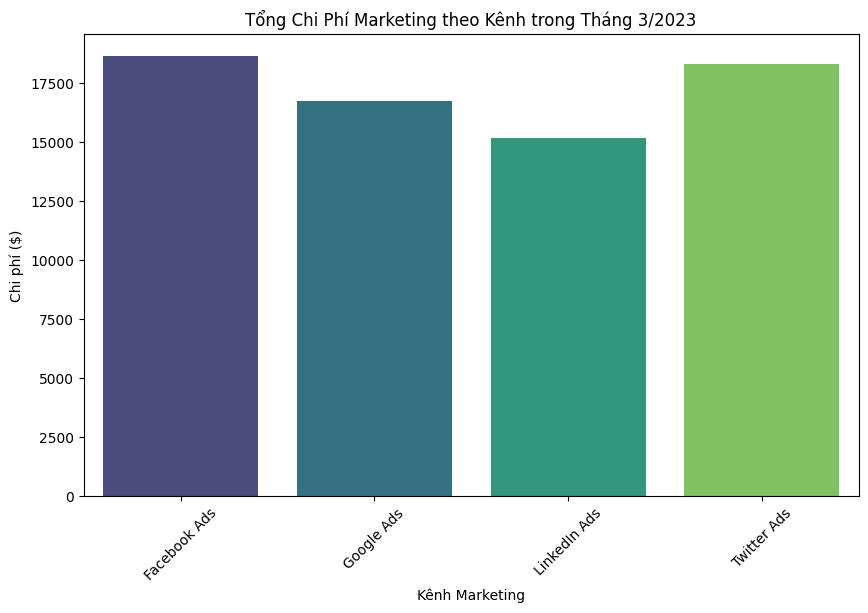

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Giả sử marketing_df đã được tải và lọc cho tháng 3/2023
# marketing_df['date'] = pd.to_datetime(marketing_df['date'])
# marketing_march_df = marketing_df[(marketing_df['date'].dt.year == 2023) & (marketing_df['date'].dt.month == 3)]

# Nhóm dữ liệu theo kênh và tính tổng chi phí
marketing_by_channel = marketing_march_df.groupby('channel')['spending'].sum().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x='channel', y='spending', data=marketing_by_channel, palette='viridis')
plt.title('Tổng Chi Phí Marketing theo Kênh trong Tháng 3/2023')
plt.xlabel('Kênh Marketing')
plt.ylabel('Chi phí ($)')
plt.xticks(rotation=45)
plt.show()

*2. Biểu đồ cột So sánh các Chỉ số Tài chính Chính*

/tmp/ipython-input-372112227.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=metrics_df, palette='magma')


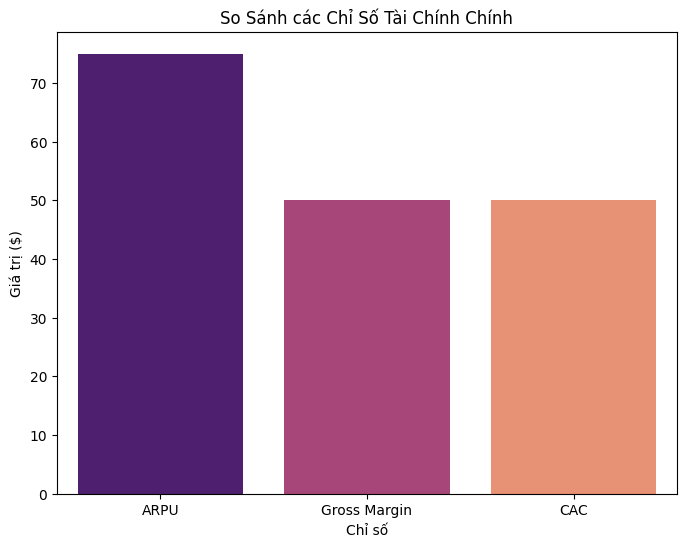

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Giả sử các biến arpu, gross_margin, cac đã được tính toán
# metrics = {
#     'ARPU': arpu,
#     'Gross Margin': gross_margin,
#     'CAC': cac,
# }
# metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

# Tạo một DataFrame giả định để minh họa nếu bạn chưa có dữ liệu
metrics_data = {'Metric': ['ARPU', 'Gross Margin', 'CAC'],
                'Value': [75, 50, 50]}
metrics_df = pd.DataFrame(metrics_data)

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='magma')
plt.title('So Sánh các Chỉ Số Tài Chính Chính')
plt.xlabel('Chỉ số')
plt.ylabel('Giá trị ($)')
plt.show()

*3. Biểu đồ tròn Phân bổ COGS*

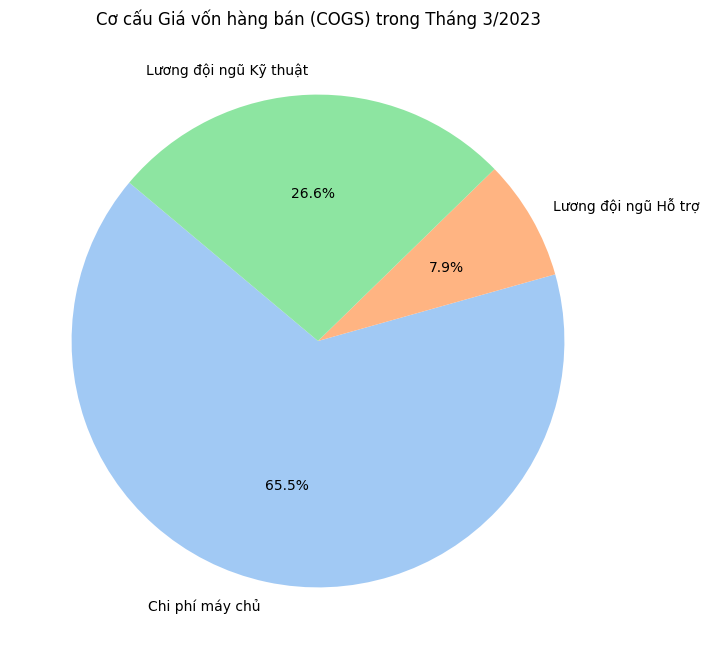

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử các biến server_costs, support_payroll, engineering_payroll đã được tính toán
# cogs_breakdown = {
#     'Chi phí máy chủ': server_costs,
#     'Lương đội ngũ Hỗ trợ': support_payroll,
#     'Lương đội ngũ Kỹ thuật': engineering_payroll,
# }

# Tạo một Dictionary giả định để minh họa nếu bạn chưa có dữ liệu
cogs_breakdown = {
    'Chi phí máy chủ': 8400 + 4400, # Ví dụ từ Monthly expenses
    'Lương đội ngũ Hỗ trợ': 600 + 500 + 450, # Ví dụ từ Payroll
    'Lương đội ngũ Kỹ thuật': 2500 + 1700 + 1000, # Ví dụ từ Payroll
}

labels = cogs_breakdown.keys()
sizes = cogs_breakdown.values()
colors = sns.color_palette('pastel')

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Cơ cấu Giá vốn hàng bán (COGS) trong Tháng 3/2023')
plt.show()